Reading the Excel sheet collected from the World Bank datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load the Excel file
file_path = 'P_Data_Extract.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Load the main data sheet
main_data = data['Data']

# Display the first few rows of the main data to understand its structure
main_data.head()

,Series Name,Series Code,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,South Africa,ZAF,17.953008,17.775922,16.567193,17.592273,16.144347,15.354747,13.967870,15.437600,16.017893,16.760630,15.655218,16.375168,21.417470,21.277695,19.259582
1,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,Morocco,MAR,40.702836,40.300683,40.037721,39.786662,39.218086,38.032338,37.236021,36.187837,35.341132,34.256072,33.293558,32.356889,32.095646,31.233778,30.751149
2,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,"Egypt, Arab Rep.",EGY,31.692123,29.957987,28.276354,29.239107,27.071350,27.958797,27.547765,25.815081,25.573828,25.061791,21.681197,21.158025,20.379130,19.289171,18.657414
3,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,Kenya,KEN,40.945393,40.528863,39.709272,39.096117,38.418364,37.807424,37.079732,36.366611,35.693871,35.079957,34.278909,33.588152,33.633225,33.262383,32.634282
4,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,Nigeria,NGA,42.868594,42.096673,41.346451,40.581766,39.521130,38.354400,38.078730,37.986699,38.249796,38.509063,38.606184,38.594313,38.782919,38.553613,37.985243



Summary statistics for Population Growth:

           2009      2010      2011      2012      2013      2014      2015  \
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000   
mean   2.022927  2.018186  2.046642  2.043953  2.025794  2.030090  2.054769   
std    0.810149  0.766669  0.710684  0.664167  0.630162  0.559699  0.480507   
min    1.189295  1.193036  1.263406  1.329159  1.344234  1.308063  1.253058   
25%    1.281106  1.308352  1.342666  1.353772  1.361621  1.576294  2.074017   
50%    1.956155  2.027640  2.207643  2.261587  2.315708  2.294178  2.200322   
75%    2.727385  2.744379  2.655435  2.525956  2.409931  2.343793  2.205260   
max    2.960692  2.817524  2.764062  2.749289  2.697474  2.628124  2.541187   

           2016      2017      2018      2019      2020      2021  
count  5.000000  5.000000  5.000000  5.000000  5.000000  5.000000  
mean   1.798131  1.654340  1.754347  1.711864  1.691956  1.611583  
std    0.663679  0.861100  0.577522  0.5

C:\Users\Youssef Senousy\AppData\Local\Temp\ipykernel_2932\384391446.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[year_cols] = df[year_cols].fillna(df[year_cols].mean())
C:\Users\Youssef Senousy\AppData\Local\Temp\ipykernel_2932\384391446.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[year_cols] = df[year_cols].fillna(df[year_cols].mean())
C:\Users\Youssef Senousy\AppData\Local\Temp\ipykernel_2932\384391446.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future versio

               2009          2010          2011          2012          2013  \
count  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   
mean   4.995732e+09  3.504763e+09  3.293898e+09  3.743153e+09  4.493462e+09   
std    3.724660e+09  2.778755e+09  3.526451e+09  2.187263e+09  2.640349e+09   
min    1.162576e+08  1.780646e+08 -4.827000e+08  1.380174e+09  1.118825e+09   
25%    1.970324e+09  1.240626e+09  1.450475e+09  2.797700e+09  3.360910e+09   
50%    6.711600e+09  3.693272e+09  2.521362e+09  2.841954e+09  4.192200e+09   
75%    7.624490e+09  6.026253e+09  4.139289e+09  4.626029e+09  5.562858e+09   
max    8.555990e+09  6.385600e+09  8.841062e+09  7.069908e+09  8.232519e+09   

               2014          2015          2016          2017          2018  \
count  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   
mean   3.888802e+09  3.076629e+09  3.279653e+09  3.181290e+09  3.759632e+09   
std    1.893152e+09  2.413434e+09  2.899553e+09  2.

C:\Users\Youssef Senousy\AppData\Local\Temp\ipykernel_2932\384391446.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[year_cols] = df[year_cols].fillna(df[year_cols].mean())
C:\Users\Youssef Senousy\AppData\Local\Temp\ipykernel_2932\384391446.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[year_cols] = df[year_cols].fillna(df[year_cols].mean())


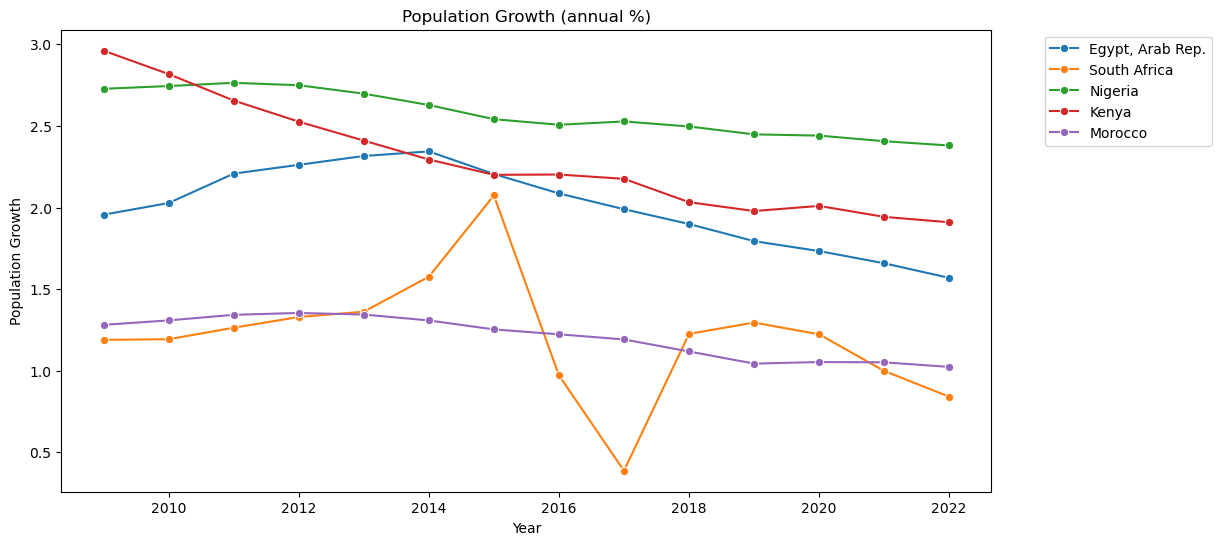

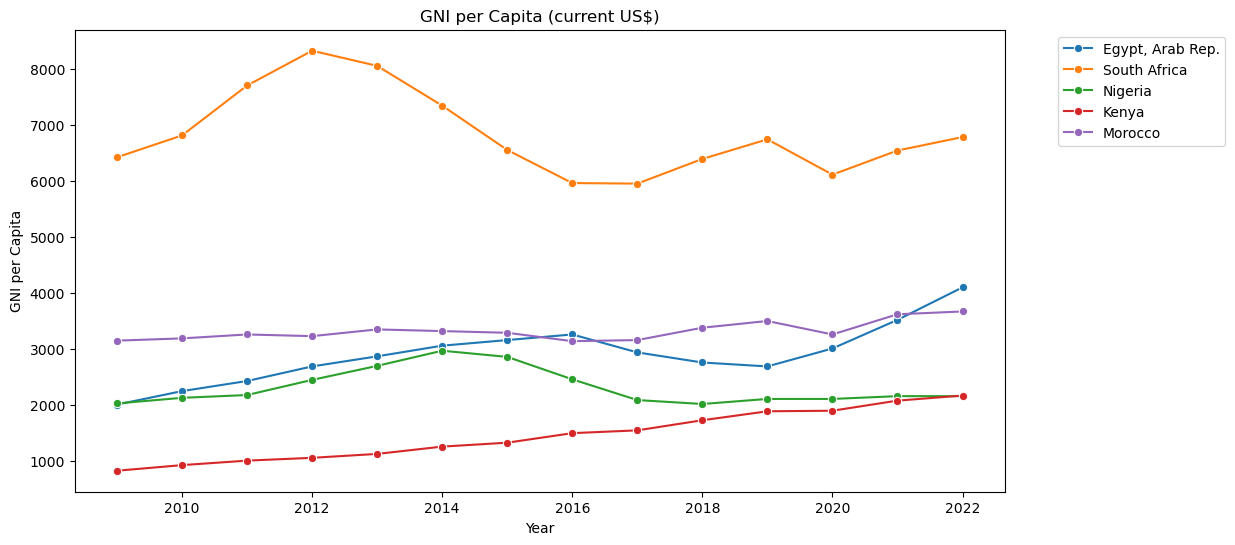

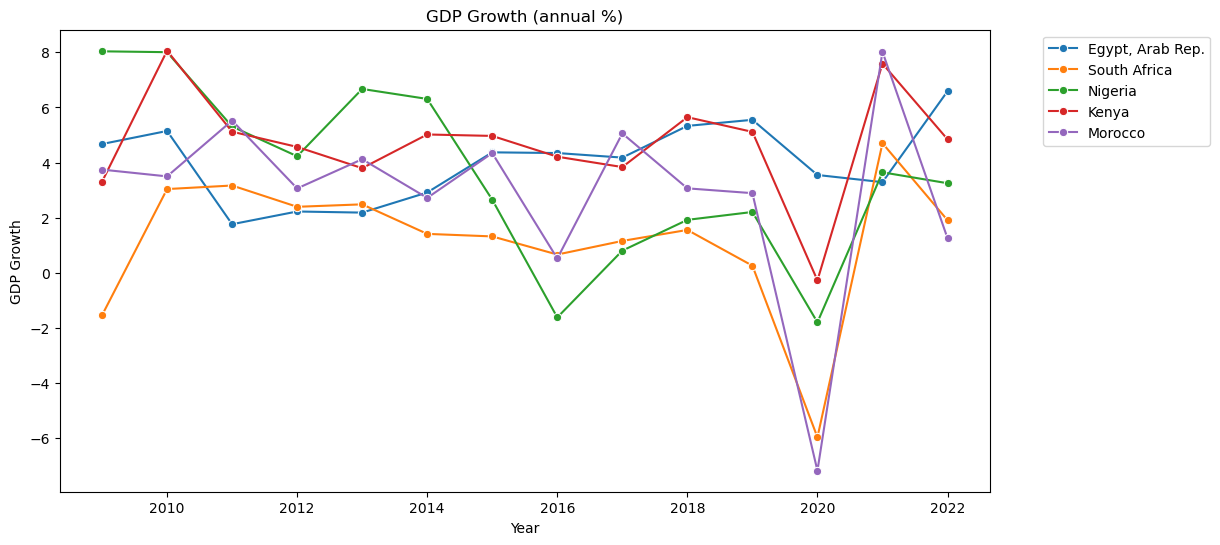

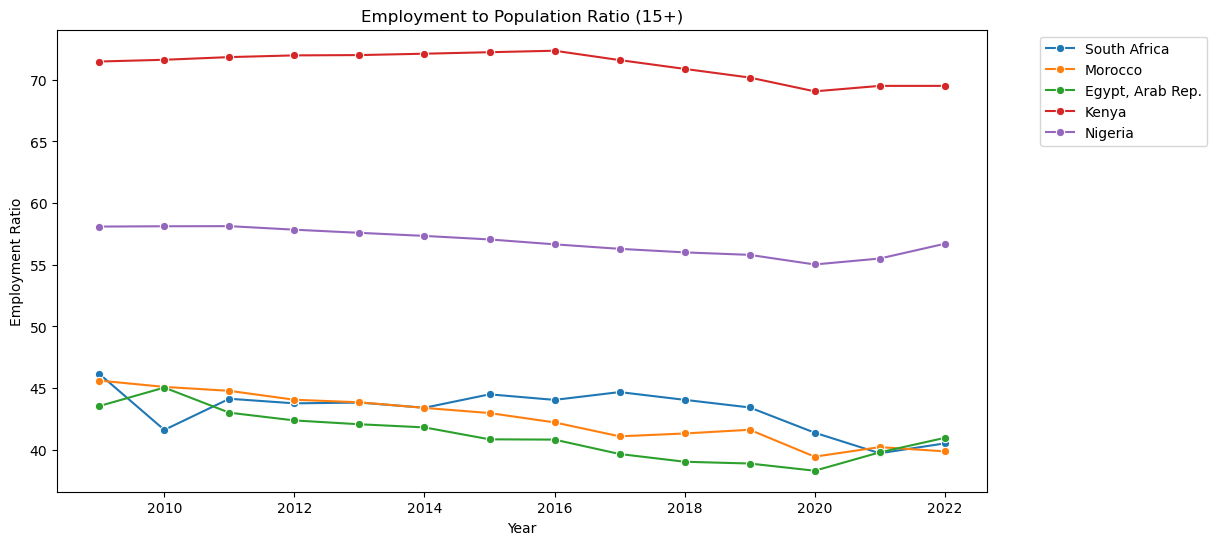

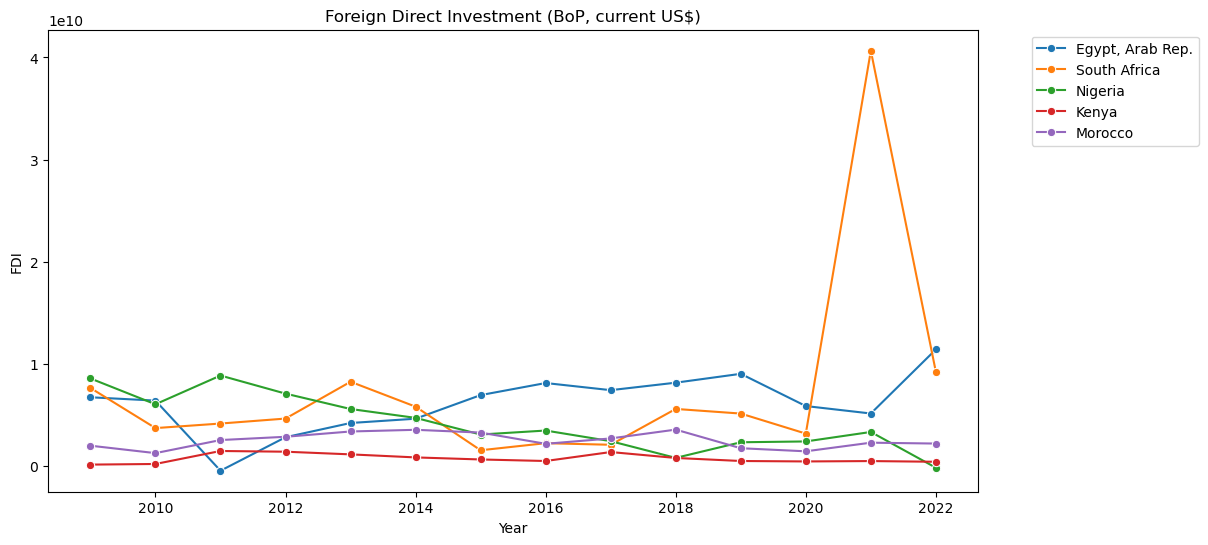

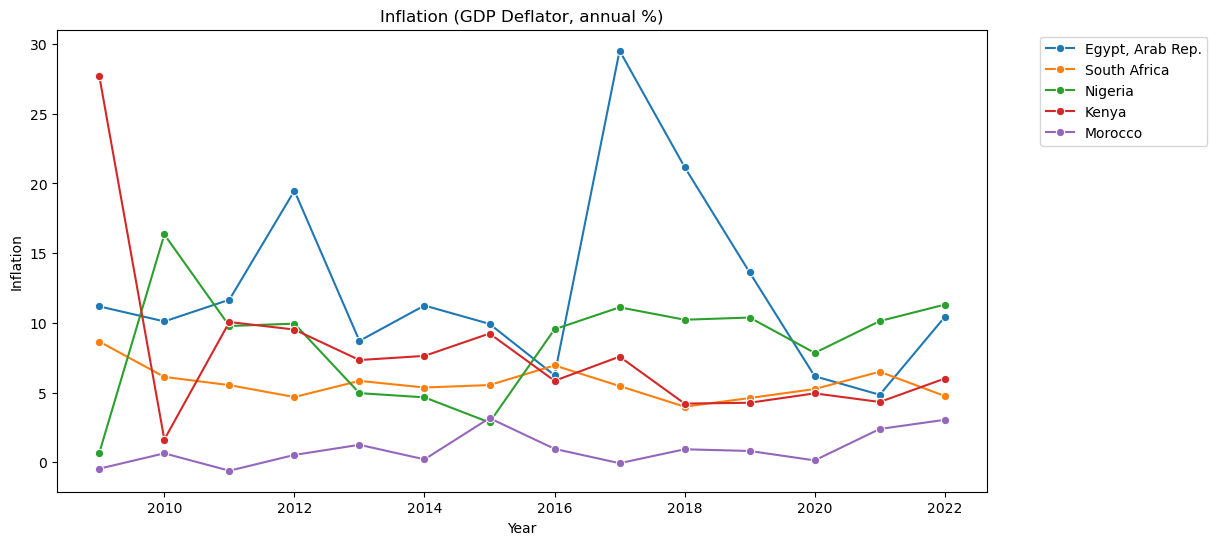

In [2]:
# Function to extract time series data for each indicator
def extract_time_series_data(series_name, year_columns):
    data = main_data[main_data['Series Name'] == series_name].copy()
    data.loc[:, year_columns] = data.loc[:, year_columns].apply(pd.to_numeric, errors='coerce')
    return data[['Country Name'] + year_columns.tolist()]

# Extracting time series data for specified indicators
year_columns = main_data.columns[5:]
population_growth_ts = extract_time_series_data('Population growth (annual %)', year_columns)
gni_per_capita_ts = extract_time_series_data('GNI per capita, Atlas method (current US$)', year_columns)
gdp_growth_ts = extract_time_series_data('GDP growth (annual %)', year_columns)
employment_ts = extract_time_series_data('Employment to population ratio, 15+, total (%) (modeled ILO estimate)', year_columns)
fdi_ts = extract_time_series_data('Foreign direct investment, net inflows (BoP, current US$)', year_columns)
inflation_ts = extract_time_series_data('Inflation, GDP deflator (annual %)', year_columns)

# Function to clean and check time series data
def clean_and_check_time_series(df, name):
    print(f"\nSummary statistics for {name}:\n")
    print(df.describe())
    print(f"\nChecking for missing values in {name}:\n")
    print(df.isna().sum())
    # Fill missing values with the mean of the column, exclude 'Country Name'
    year_cols = df.columns[1:]
    df[year_cols] = df[year_cols].fillna(df[year_cols].mean())
    print(f"\nData after cleaning {name}:\n")
    print(df.head())
    return df

# Clean and check time series data
population_growth_ts = clean_and_check_time_series(population_growth_ts, "Population Growth")
gni_per_capita_ts = clean_and_check_time_series(gni_per_capita_ts, "GNI per Capita")
gdp_growth_ts = clean_and_check_time_series(gdp_growth_ts, "GDP Growth")
employment_ts = clean_and_check_time_series(employment_ts, "Employment")
fdi_ts = clean_and_check_time_series(fdi_ts, "FDI")
inflation_ts = clean_and_check_time_series(inflation_ts, "Inflation")

# Function to generate time series plots for each indicator
def plot_time_series(df, title, ylabel):
    df_melted = df.melt(id_vars=['Country Name'], var_name='Year', value_name=ylabel)
    df_melted['Year'] = df_melted['Year'].astype(int)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melted, x='Year', y=ylabel, hue='Country Name', marker='o')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Year')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Generate time series plots for each indicator
plot_time_series(population_growth_ts, 'Population Growth (annual %)', 'Population Growth')
plot_time_series(gni_per_capita_ts, 'GNI per Capita (current US$)', 'GNI per Capita')
plot_time_series(gdp_growth_ts, 'GDP Growth (annual %)', 'GDP Growth')
plot_time_series(employment_ts, 'Employment to Population Ratio (15+)', 'Employment Ratio')
plot_time_series(fdi_ts, 'Foreign Direct Investment (BoP, current US$)', 'FDI')
plot_time_series(inflation_ts, 'Inflation (GDP Deflator, annual %)', 'Inflation')


Summary statistics for Population Growth:

            Country Name  Population growth (annual %)
count                  5                      5.000000
unique                 5                      5.000000
top     Egypt, Arab Rep.                      2.003384
freq                   1                      1.000000

Checking for missing values in Population Growth:

Country Name                    0
Population growth (annual %)    0
dtype: int64

Data after cleaning Population Growth:

        Country Name Population growth (annual %)
75  Egypt, Arab Rep.                     2.003384
76      South Africa                     1.209277
77           Nigeria                     2.575577
78             Kenya                     2.293933
79           Morocco                     1.206826

Summary statistics for GNI per Capita:

            Country Name  GNI per capita, Atlas method (current US$)
count                  5                                    5.000000
unique                 5    

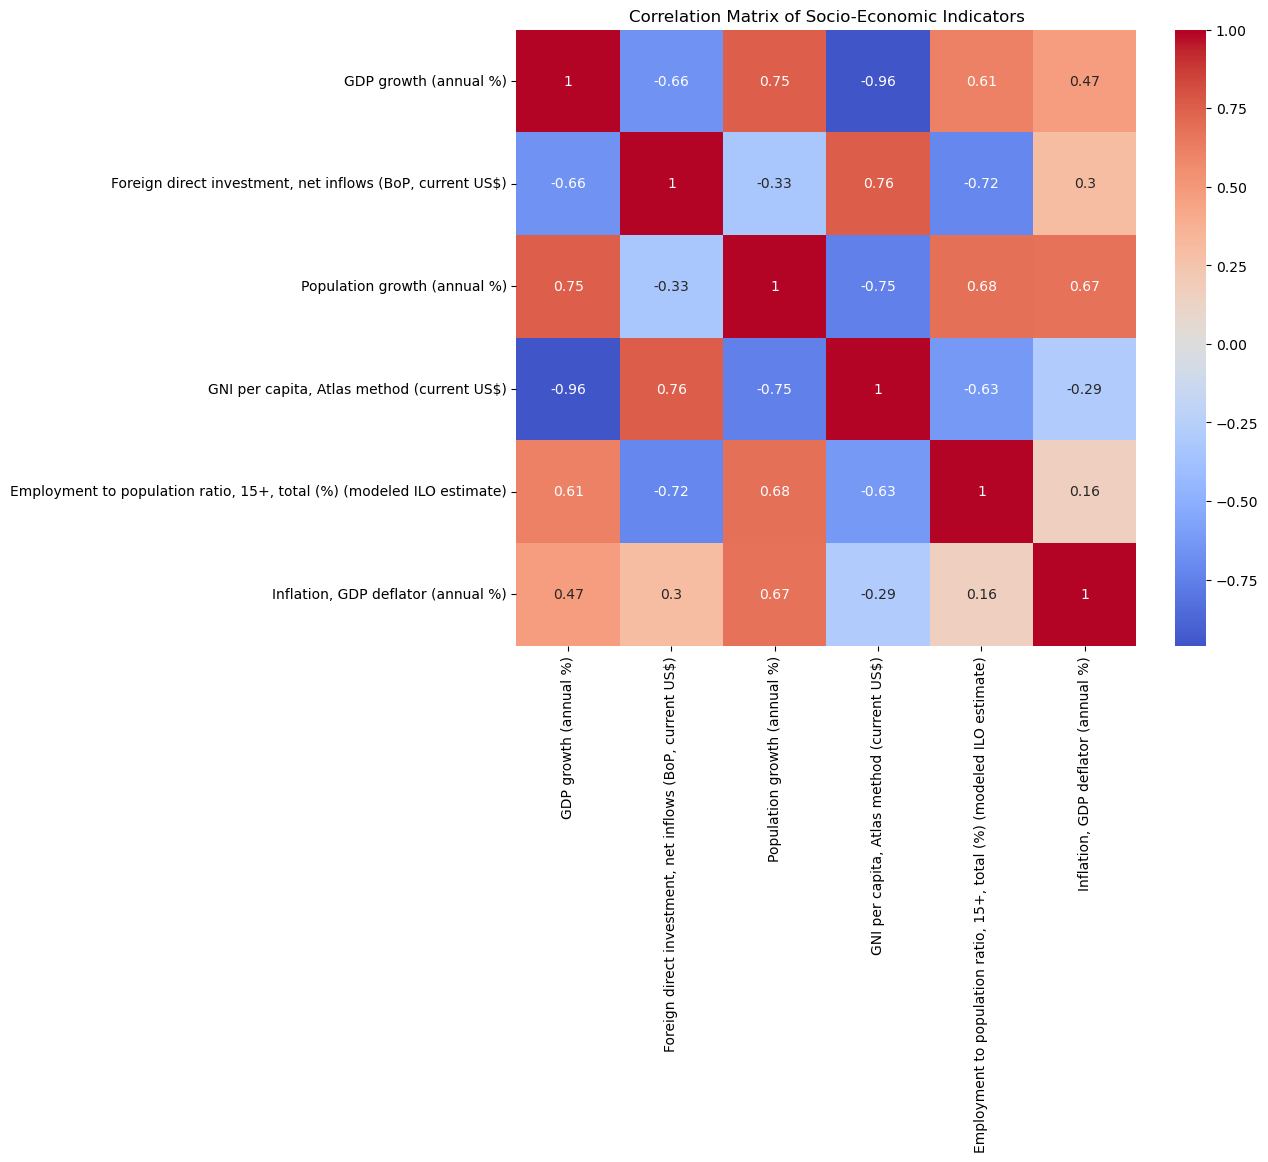

In [3]:
# Function to extract and process data
def extract_and_process_data(series_name, year_columns):
    data = main_data[main_data['Series Name'] == series_name].copy()
    data.loc[:, year_columns] = data.loc[:, year_columns].apply(pd.to_numeric, errors='coerce')
    data['Average'] = data.loc[:, year_columns].mean(axis=1)
    return data[['Country Name', 'Average']].rename(columns={'Average': series_name})

# Extracting specified variables from the dataset
year_columns = main_data.columns[5:]
population_growth_data = extract_and_process_data('Population growth (annual %)', year_columns)
gni_per_capita_data = extract_and_process_data('GNI per capita, Atlas method (current US$)', year_columns)
gdp_growth_data = extract_and_process_data('GDP growth (annual %)', year_columns)
employment_data = extract_and_process_data('Employment to population ratio, 15+, total (%) (modeled ILO estimate)', year_columns)
fdi_data = extract_and_process_data('Foreign direct investment, net inflows (BoP, current US$)', year_columns)
inflation_data = extract_and_process_data('Inflation, GDP deflator (annual %)', year_columns)

# Function to check and clean individual dataframes
def check_and_clean_data(df, name):
    print(f"\nSummary statistics for {name}:\n")
    print(df.describe())
    print(f"\nChecking for missing values in {name}:\n")
    print(df.isna().sum())
    # Fill missing values with the mean of the column, exclude 'Country Name'
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    print(f"\nData after cleaning {name}:\n")
    print(df.head())
    return df

# Check and clean individual dataframes
population_growth_data = check_and_clean_data(population_growth_data, "Population Growth")
gni_per_capita_data = check_and_clean_data(gni_per_capita_data, "GNI per Capita")
gdp_growth_data = check_and_clean_data(gdp_growth_data, "GDP Growth")
employment_data = check_and_clean_data(employment_data, "Employment")
fdi_data = check_and_clean_data(fdi_data, "FDI")
inflation_data = check_and_clean_data(inflation_data, "Inflation")

# Inspect the cleaned dataframes before merging
print("\nInspecting cleaned dataframes before merging:\n")
print(population_growth_data.head())
print(gni_per_capita_data.head())
print(gdp_growth_data.head())
print(employment_data.head())
print(fdi_data.head())
print(inflation_data.head())

# Merge all data with GDP growth data
merged_data = gdp_growth_data[['Country Name', 'GDP growth (annual %)']].merge(
    fdi_data[['Country Name', 'Foreign direct investment, net inflows (BoP, current US$)']], on='Country Name', how='outer'
).merge(
    population_growth_data, on='Country Name', how='outer'
).merge(
    gni_per_capita_data, on='Country Name', how='outer'
).merge(
    employment_data, on='Country Name', how='outer'
).merge(
    inflation_data, on='Country Name', how='outer'
)

# Inspect the merged data before cleaning
print("\nMerged data before cleaning:\n")
print(merged_data.head())
print("\nChecking for missing values in merged data:\n")
print(merged_data.isna().sum())

# Fill missing values with column means to preserve rows for numeric columns only
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns
merged_data[numeric_cols] = merged_data[numeric_cols].fillna(merged_data[numeric_cols].mean())

# Drop rows with remaining NaN values
merged_data = merged_data.dropna()

# Check if merged_data is empty after cleaning
print(f"\nMerged data size after cleaning: {merged_data.shape}")
if merged_data.empty:
    raise ValueError("The merged data is empty after cleaning. Please check the data for missing values.")

# Ensure all data is numeric and without NaNs
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')

# Exclude the 'Country Name' column for the correlation matrix and regression analysis
merged_data_numeric = merged_data.drop(columns=['Country Name'])

# Check for perfect multicollinearity
print("\nCorrelation matrix of the merged data:\n")
correlation_matrix = merged_data_numeric.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Socio-Economic Indicators')
plt.show()

In [4]:
# Define dependent and independent variables
X1 = merged_data[['Population growth (annual %)', 'GNI per capita, Atlas method (current US$)', 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)']]
y1 = merged_data['GDP growth (annual %)']

# Add a constant to the independent variables
X1 = sm.add_constant(X1)

# Create and fit the model with robust standard errors
model1 = sm.OLS(y1, X1).fit(cov_type='HC3')  # Using HC3 robust standard errors

# Print the summary of the model
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.923
Model:                               OLS   Adj. R-squared:                  0.692
Method:                    Least Squares   F-statistic:                    0.1020
Date:                   Sun, 15 Sep 2024   Prob (F-statistic):              0.948
Time:                           18:11:20   Log-Likelihood:                -1.5811
No. Observations:                      5   AIC:                             11.16
Df Residuals:                          1   BIC:                             9.600
Df Model:                              3                                         
Covariance Type:                     HC3                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

D:\Anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


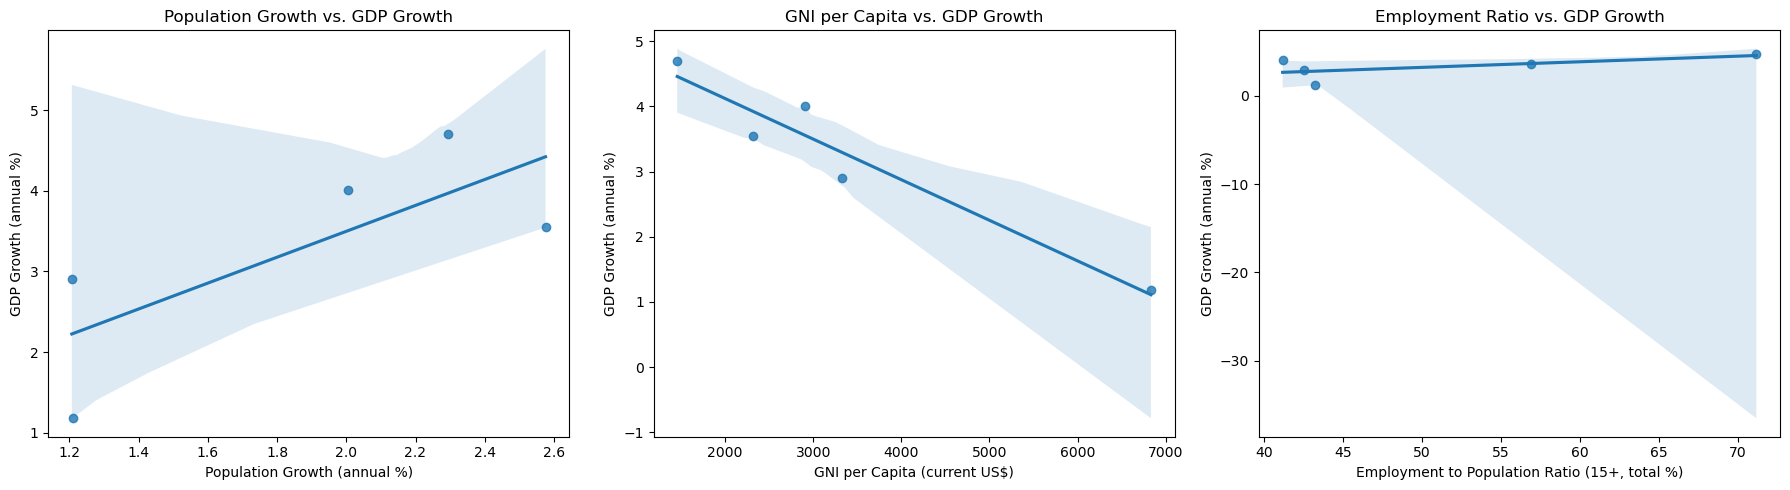

In [5]:
# Visualize the relationship between independent variables and dependent variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Population growth vs. GDP growth
sns.regplot(ax=axes[0], x='Population growth (annual %)', y='GDP growth (annual %)', data=merged_data)
axes[0].set_title('Population Growth vs. GDP Growth')
axes[0].set_xlabel('Population Growth (annual %)')
axes[0].set_ylabel('GDP Growth (annual %)')

# Plot GNI per capita vs. GDP growth
sns.regplot(ax=axes[1], x='GNI per capita, Atlas method (current US$)', y='GDP growth (annual %)', data=merged_data)
axes[1].set_title('GNI per Capita vs. GDP Growth')
axes[1].set_xlabel('GNI per Capita (current US$)')
axes[1].set_ylabel('GDP Growth (annual %)')

# Plot Employment to population ratio vs. GDP growth
sns.regplot(ax=axes[2], x='Employment to population ratio, 15+, total (%) (modeled ILO estimate)', y='GDP growth (annual %)', data=merged_data)
axes[2].set_title('Employment Ratio vs. GDP Growth')
axes[2].set_xlabel('Employment to Population Ratio (15+, total %)')
axes[2].set_ylabel('GDP Growth (annual %)')

plt.tight_layout()
plt.show()

In [6]:
# Define dependent and independent variables for Model 2
X2 = merged_data[['GDP growth (annual %)', 'Population growth (annual %)', 'GNI per capita, Atlas method (current US$)']]
y2 = merged_data['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']

# Add a constant to the independent variables
X2 = sm.add_constant(X2)

# Create and fit the model
model2 = sm.OLS(y2, X2).fit(cov_type='HC3')  # Using HC3 robust standard errors

# Print the summary
print(model2.summary())

                                                      OLS Regression Results                                                     
Dep. Variable:     Employment to population ratio, 15+, total (%) (modeled ILO estimate)   R-squared:                       0.495
Model:                                                                               OLS   Adj. R-squared:                 -1.020
Method:                                                                    Least Squares   F-statistic:                   0.01955
Date:                                                                   Sun, 15 Sep 2024   Prob (F-statistic):              0.994
Time:                                                                           18:11:22   Log-Likelihood:                -17.631
No. Observations:                                                                      5   AIC:                             43.26
Df Residuals:                                                                          1  

D:\Anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


D:\Anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                                                      OLS Regression Results                                                     
Dep. Variable:     Employment to population ratio, 15+, total (%) (modeled ILO estimate)   R-squared:                       0.495
Model:                                                                               OLS   Adj. R-squared:                 -1.020
Method:                                                                    Least Squares   F-statistic:                   0.01955
Date:                                                                   Sun, 15 Sep 2024   Prob (F-statistic):              0.994
Time:                                                                           18:11:22   Log-Likelihood:                -17.631
No. Observations:                                                                      5   AIC:                             43.26
Df Residuals:                                                                          1  

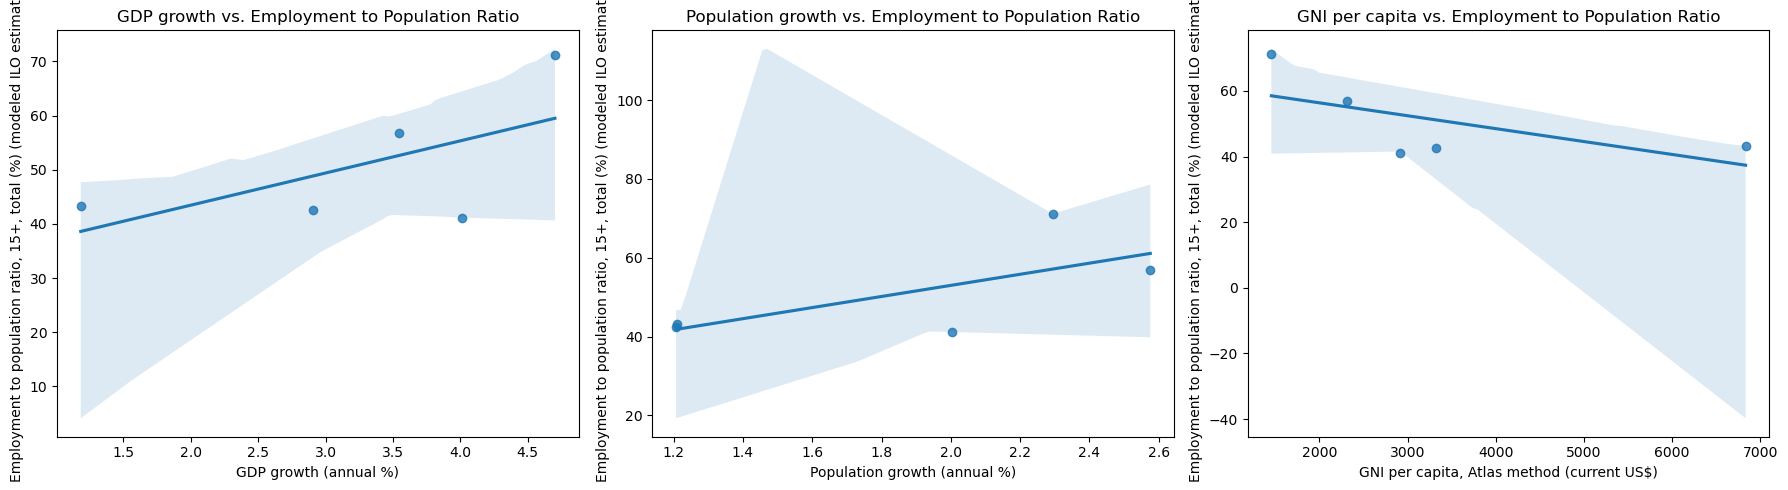

In [7]:
# Assuming merged_data is already defined and preprocessed
# Define dependent and independent variables for Model 2
X2 = merged_data[['GDP growth (annual %)', 'Population growth (annual %)', 'GNI per capita, Atlas method (current US$)']]
y2 = merged_data['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']

# Add a constant to the independent variables
X2 = sm.add_constant(X2)

# Create and fit the model using robust standard errors
model2 = sm.OLS(y2, X2).fit(cov_type='HC3')  # Using HC3 robust standard errors

# Print the summary
print(model2.summary())

# Visualize the relationship between independent variables and dependent variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot GDP growth vs. Employment to population ratio
sns.regplot(ax=axes[0], x='GDP growth (annual %)', y='Employment to population ratio, 15+, total (%) (modeled ILO estimate)', data=merged_data)
axes[0].set_title('GDP growth vs. Employment to Population Ratio')
axes[0].set_xlabel('GDP growth (annual %)')
axes[0].set_ylabel('Employment to population ratio, 15+, total (%) (modeled ILO estimate)')

# Plot Population growth vs. Employment to population ratio
sns.regplot(ax=axes[1], x='Population growth (annual %)', y='Employment to population ratio, 15+, total (%) (modeled ILO estimate)', data=merged_data)
axes[1].set_title('Population growth vs. Employment to Population Ratio')
axes[1].set_xlabel('Population growth (annual %)')
axes[1].set_ylabel('Employment to population ratio, 15+, total (%) (modeled ILO estimate)')

# Plot GNI per capita vs. Employment to population ratio
sns.regplot(ax=axes[2], x='GNI per capita, Atlas method (current US$)', y='Employment to population ratio, 15+, total (%) (modeled ILO estimate)', data=merged_data)
axes[2].set_title('GNI per capita vs. Employment to Population Ratio')
axes[2].set_xlabel('GNI per capita, Atlas method (current US$)')
axes[2].set_ylabel('Employment to population ratio, 15+, total (%) (modeled ILO estimate)')

plt.tight_layout()
plt.show()

In [8]:
# Define dependent and independent variables
X3 = merged_data[['GDP growth (annual %)', 'Foreign direct investment, net inflows (BoP, current US$)', 'Population growth (annual %)']]
y3 = merged_data['Inflation, GDP deflator (annual %)']

# Add a constant to the independent variables
X3 = sm.add_constant(X3)

# Create and fit the model using robust standard errors
model3 = sm.OLS(y3, X3).fit(cov_type='HC3')  # HC3 is one type of robust standard errors

# Print the summary
print(model3.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Inflation, GDP deflator (annual %)   R-squared:                       0.944
Model:                                            OLS   Adj. R-squared:                  0.775
Method:                                 Least Squares   F-statistic:                    0.8256
Date:                                Sun, 15 Sep 2024   Prob (F-statistic):              0.614
Time:                                        18:11:23   Log-Likelihood:                -6.5464
No. Observations:                                   5   AIC:                             21.09
Df Residuals:                                       1   BIC:                             19.53
Df Model:                                           3                                         
Covariance Type:                                  HC3                                         
                                                  

D:\Anaconda\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


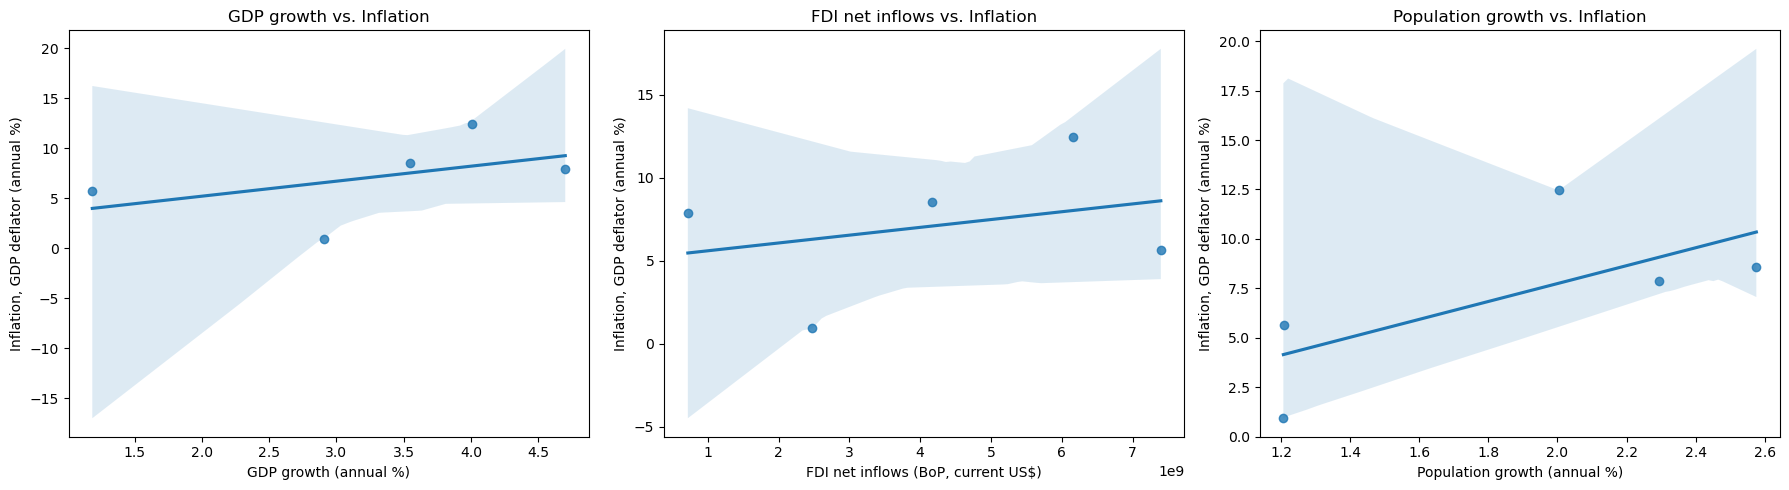

In [9]:
# Visualize the relationship between independent variables and dependent variable
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot GDP growth vs. Inflation
sns.regplot(ax=axes[0], x='GDP growth (annual %)', y='Inflation, GDP deflator (annual %)', data=merged_data)
axes[0].set_title('GDP growth vs. Inflation')
axes[0].set_xlabel('GDP growth (annual %)')
axes[0].set_ylabel('Inflation, GDP deflator (annual %)')

# Plot FDI net inflows vs. Inflation
sns.regplot(ax=axes[1], x='Foreign direct investment, net inflows (BoP, current US$)', y='Inflation, GDP deflator (annual %)', data=merged_data)
axes[1].set_title('FDI net inflows vs. Inflation')
axes[1].set_xlabel('FDI net inflows (BoP, current US$)')
axes[1].set_ylabel('Inflation, GDP deflator (annual %)')

# Plot Population growth vs. Inflation
sns.regplot(ax=axes[2], x='Population growth (annual %)', y='Inflation, GDP deflator (annual %)', data=merged_data)
axes[2].set_title('Population growth vs. Inflation')
axes[2].set_xlabel('Population growth (annual %)')
axes[2].set_ylabel('Inflation, GDP deflator (annual %)')

plt.tight_layout()
plt.show()